# d1_pyore Tutorial

The d1_pyore library facilitates creation and consumption of OAI-ORE documents that are used by DataONE to dscribe data packages (i.e. the combination of Data and Metadata that make up a scientifically meaningful usint of information.

Load the RDF-XML data from a DataONE Coordinating Node. Note that this direct access is more fragile than using the combination of resolve() and get().

In [1]:
import requests
import urllib.parse

#identifier for a resource map
pid = "ark:/13030/m5dz07z6/2/mrt-dataone-map.rdf"
url = "https://cn.dataone.org/cn/v2/object/" + urllib.parse.quote(pid.encode('utf-8'))
ore_document = requests.get(url).text
print(ore_document)

<rdf:RDF
    xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
    xmlns:foaf="http://xmlns.com/foaf/0.1/"
    xmlns:dc="http://purl.org/dc/elements/1.1/"
    xmlns:ore="http://www.openarchives.org/ore/terms/"
    xmlns:dcterms="http://purl.org/dc/terms/"
    xmlns:cito="http://purl.org/spar/cito/"
    xmlns:rdfs1="http://www.w3.org/2001/01/rdf-schema#" > 
  <rdf:Description rdf:about="http://www.openarchives.org/ore/terms/Aggregation">
    <rdfs1:label>Aggregation</rdfs1:label>
    <rdfs1:isDefinedBy rdf:resource="http://www.openarchives.org/ore/terms/"/>
  </rdf:Description>
  <rdf:Description rdf:about="https://cn.dataone.org/cn/v1/resolve/ark%3A%2F13030%2Fm5dz07z6%2F2%2Fcadwsap-s3400113-001-vuln.csv">
    <dcterms:identifier>ark:/13030/m5dz07z6/2/cadwsap-s3400113-001-vuln.csv</dcterms:identifier>
    <cito:isDocumentedBy rdf:resource="https://cn.dataone.org/cn/v1/resolve/ark%3A%2F13030%2Fm5dz07z6%2F2%2Fcadwsap-s3400113-001.xml"/>
  </rdf:Description>
  <rdf:Description rdf:ab

## Convert to JSON-LD

Print out the OAI-ORE document in JSON-LD format, which is more easily processed using Javascript.

In [2]:
from d1_common import resource_map
ore_object = resource_map.ResourceMap()
ore_object.parse(data=ore_document)
json_document = ore_object.serialize(format="json-ld").decode() 
print(json_document)

[
  {
    "@id": "https://cn.dataone.org/cn/v1/resolve/ark%3A%2F13030%2Fm5dz07z6%2F2%2Fcadwsap-s3400113-001.pdf",
    "http://purl.org/dc/terms/identifier": [
      {
        "@value": "ark:/13030/m5dz07z6/2/cadwsap-s3400113-001.pdf"
      }
    ],
    "http://purl.org/spar/cito/isDocumentedBy": [
      {
        "@id": "https://cn.dataone.org/cn/v1/resolve/ark%3A%2F13030%2Fm5dz07z6%2F2%2Fcadwsap-s3400113-001.xml"
      }
    ]
  },
  {
    "@id": "https://cn.dataone.org/cn/v1/resolve/ark%3A%2F13030%2Fm5dz07z6%2F2%2Fcadwsap-s3400113-001-vuln.csv",
    "http://purl.org/dc/terms/identifier": [
      {
        "@value": "ark:/13030/m5dz07z6/2/cadwsap-s3400113-001-vuln.csv"
      }
    ],
    "http://purl.org/spar/cito/isDocumentedBy": [
      {
        "@id": "https://cn.dataone.org/cn/v1/resolve/ark%3A%2F13030%2Fm5dz07z6%2F2%2Fcadwsap-s3400113-001.xml"
      }
    ]
  },
  {
    "@id": "http://www.openarchives.org/ore/terms/Aggregation",
    "http://www.w3.org/2001/01/rdf-schema#isDefine

## Compact the JSON-LD document 


In [3]:
import json
from pyld import jsonld

context = {
    "@context":{
        "ore":"http://www.openarchives.org/ore/terms/",
        "dc":"http://purl.org/dc/elements/",
        "dct":"http://purl.org/dc/terms/",
        "dataone":"https://cn.dataone.org/cn/",
        "cito":"http://purl.org/spar/cito/"
    }
}
doc = json.loads(json_document)
compacted = jsonld.compact(doc, context)
print(json.dumps(compacted, indent=2))


{
  "@context": {
    "ore": "http://www.openarchives.org/ore/terms/",
    "dc": "http://purl.org/dc/elements/",
    "dct": "http://purl.org/dc/terms/",
    "dataone": "https://cn.dataone.org/cn/",
    "cito": "http://purl.org/spar/cito/"
  },
  "@graph": [
    {
      "@id": "http://store.cdlib.org:35121/content/1001/ark%3A%2F13030%2Fm5dz07z6/2/",
      "dct:title": "Simple aggregation of science metadata and data",
      "ore:aggregates": [
        {
          "@id": "dataone:v1/resolve/ark%3A%2F13030%2Fm5dz07z6%2F2%2Fcadwsap-s3400113-001.xml"
        },
        {
          "@id": "dataone:v1/resolve/ark%3A%2F13030%2Fm5dz07z6%2F2%2Fcadwsap-s3400113-001-main.csv"
        },
        {
          "@id": "dataone:v1/resolve/ark%3A%2F13030%2Fm5dz07z6%2F2%2Fcadwsap-s3400113-001-vuln.csv"
        },
        {
          "@id": "dataone:v1/resolve/ark%3A%2F13030%2Fm5dz07z6%2F2%2Fcadwsap-s3400113-001.pdf"
        }
      ],
      "http://www.w3.org/2001/01/rdf-schema#isDefinedBy": {
        "@i

## Retrieve Data IDs

Retrieve the entries that are the target of a CITO:documents statement. CITO:documents is used to indicate that the subject, i.e. a metadata document, docments the object, i.e. a data object.

In [4]:
from d1_common import resource_map
import pprint
# A list of dc.identifer entries for each entry that is object of CITO:documents 
documents = ore_object.getAggregatedScienceDataPids()
pprint.pprint(documents)

['ark:/13030/m5dz07z6/2/cadwsap-s3400113-001.pdf',
 'ark:/13030/m5dz07z6/2/cadwsap-s3400113-001-vuln.csv',
 'ark:/13030/m5dz07z6/2/cadwsap-s3400113-001-main.csv']


## Rendered Graph

Render the OAI-ORE document using Graphviz

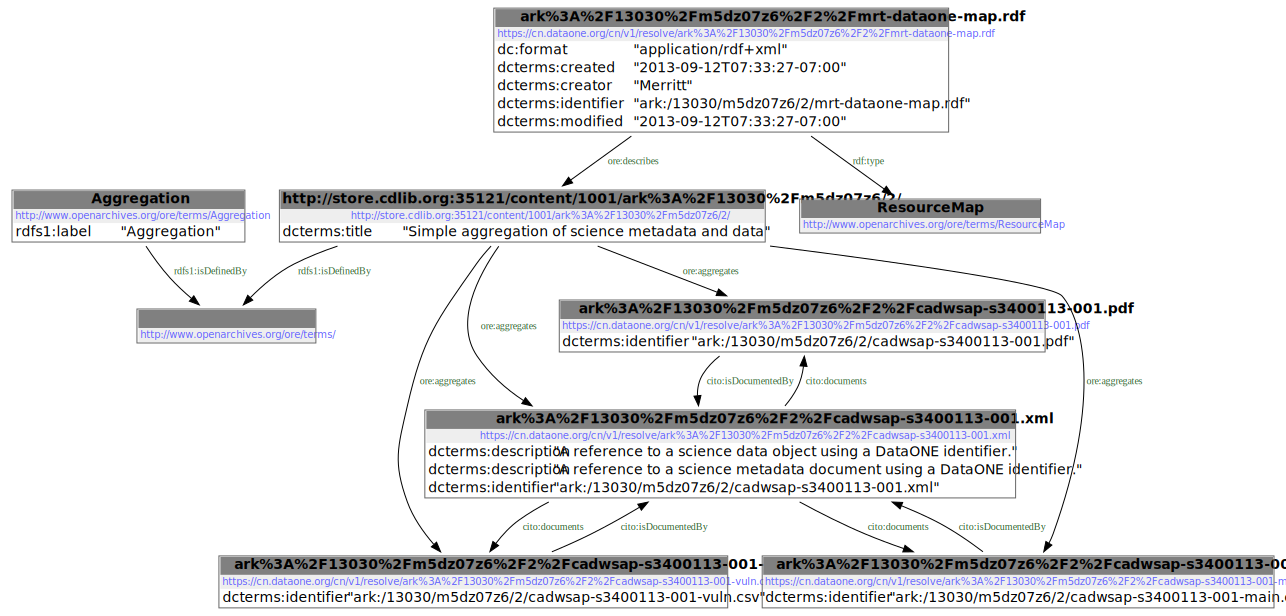

In [5]:
from graphviz import Source
from io import StringIO
ore_dot = StringIO()
from rdflib.tools import rdf2dot
#rdf2dot.rdf2dot(ore_object, ore_dot)
ore_object.asGraphvizDot(ore_dot)
#print(ore_dot.getvalue())
ore_graph = Source(ore_dot.getvalue())
ore_graph